# Logistic Regression Pipeline for A549 (GREG)

This notebook assesses variaegated implementations of the logistic regression models for the data dervied from the A549 cell-line in GREG.

## Contents

* [1. Loading Packages](#link1)
* [2. Loading Data](#link2)
* [3. Building Model](#link3)
* [4. Dealing with the *Paradox* of Accuracy ](#link4)
    * [4.1 Problem of Class Imbalance](#link5)
        * [4.1.1 Oversampling of minority class](#link6)
        * [4.1.2 Undersampling of minority class](#link7)
        * [4.1.3 SMOTE](#link8)
        * [4.1.4 Both over- and under-sampling](#link9)
* [5. Ratifying the *Pareto's Principle*](#link10)
    * [5.1 SMOTE data](#link11)
* [6. Visualizing Predictions](#link12)
* [7. Session Information](#link13)

### <a id=link1>1. Loading Packages </a>

In [1]:
install.packages("glmnet", repos = "https://cran.us.r-project.org")
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.0-2



### <a id=link2>2. Loading Data </a>

In [1]:
a549greg <- read.table("A549forML.txt", header = TRUE) ## loading data
a549greg <- a549greg[, -c(1:3)] ## removing the first three columns for non-usage in the ML model.

In [3]:
head(a549greg)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
2,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
3,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
4,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
5,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
6,0,0,0.02727825,0.02613314,1.58534,0,0.03331304,1.537907,0.02891425,0.1631014,0.06050439,0.05796767,Non-Hub


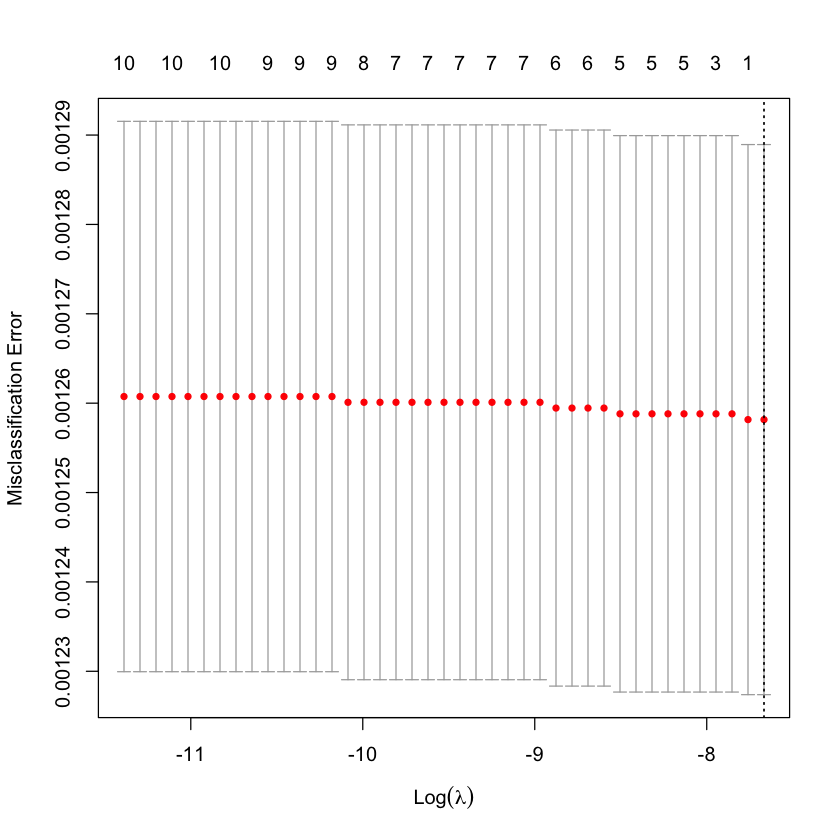

In [4]:
set.seed(005)
cv.modelfit <- cv.glmnet(as.matrix(a549greg[,1:12]),
                         a549greg$Class,
                         family = "binomial",
                         type.measure = "class",
                         alpha = 1,
                         nlambda = 100)


plot(cv.modelfit)

In [5]:
cat("There are", length(cv.modelfit$lambda),
    "lambda values in all:\n",
    cv.modelfit$lambda,
    "\n, out of which",
    min(cv.modelfit$lambda),
    "is the minimum, while",
    cv.modelfit$lambda.1se,
    "denotes the value at which the model is optimized at one standard error.")

There are 41 lambda values in all:
 0.0004680186 0.0004264411 0.0003885573 0.0003540389 0.0003225871 0.0002939293 0.0002678174 0.0002440253 0.0002223468 0.0002025941 0.0001845962 0.0001681972 0.000153255 0.0001396402 0.000127235 0.0001159318 0.0001056327 9.62486e-05 8.769814e-05 7.990728e-05 7.280854e-05 6.634043e-05 6.044693e-05 5.507699e-05 5.01841e-05 4.572588e-05 4.166372e-05 3.796243e-05 3.458995e-05 3.151708e-05 2.871719e-05 2.616603e-05 2.384151e-05 2.17235e-05 1.979364e-05 1.803523e-05 1.643303e-05 1.497317e-05 1.364299e-05 1.243098e-05 1.132665e-05 
, out of which 1.132665e-05 is the minimum, while 0.0004680186 denotes the value at which the model is optimized at one standard error.

### <a id=link3>3. Building Model </a>

In [6]:
set.seed(2)
modelfit <- glmnet(as.matrix(a549greg[,1:12]),
                   a549greg$Class,
                   family = "binomial",
                   alpha = 1,
                   lambda = min(cv.modelfit$lambda))
# Listing non-zero coefficients
print(modelfit$beta[,1])

        CTCF        EP300     H3K27me3     H3K36me3      H3K4me1      H3K4me2 
-0.085831339 -0.044517940 -0.044367058 -0.170825653 -0.021758567 -0.020956371 
     H3K4me3       H3K9ac      H3K9me3        RAD21      RNAPol2          YY1 
 0.000000000 -0.004894414  0.024193190  0.055130404  0.000000000 -0.003314569 


In [7]:
coef(modelfit)[,1]
predict(modelfit, type="coef")

(Intercept)         CTCF        EP300     H3K27me3     H3K36me3      H3K4me1 
 6.920308396 -0.085831339 -0.044517940 -0.044367058 -0.170825653 -0.021758567 
     H3K4me2      H3K4me3       H3K9ac      H3K9me3        RAD21      RNAPol2 
-0.020956371  0.000000000 -0.004894414  0.024193190  0.055130404  0.000000000 
         YY1 
-0.003314569

13 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  6.920308396
CTCF        -0.085831339
EP300       -0.044517940
H3K27me3    -0.044367058
H3K36me3    -0.170825653
H3K4me1     -0.021758567
H3K4me2     -0.020956371
H3K4me3      .          
H3K9ac      -0.004894414
H3K9me3      0.024193190
RAD21        0.055130404
RNAPol2      .          
YY1         -0.003314569

In [4]:
set.seed(5) # for reproducibility of results.
a549greg$Class <- as.numeric(as.factor(a549greg$Class))-1
part <- sample(2, nrow(a549greg),
               replace = TRUE,
               prob = c(0.7,0.3))
train <- a549greg[part==1,]
test <- a549greg[part==2,]
cat("So, now we have",
    nrow(train),
    "training rows and",
    nrow(test),
    "testing rows")

a549model <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = train,
               family = "binomial")
summary(a549model)

So, now we have 1084135 training rows and 464157 testing rows


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8513   0.0448   0.0472   0.0502   1.3138  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.945139   0.038536 180.226  < 2e-16 ***
CTCF        -0.080417   0.022269  -3.611 0.000305 ***
EP300       -0.039099   0.015741  -2.484 0.012994 *  
H3K27me3    -0.052015   0.027513  -1.891 0.058685 .  
H3K36me3    -0.166691   0.026401  -6.314 2.72e-10 ***
H3K4me1     -0.023648   0.005652  -4.184 2.87e-05 ***
H3K4me2     -0.032906   0.015826  -2.079 0.037601 *  
H3K4me3      0.014759   0.016058   0.919 0.358045    
H3K9ac      -0.007253   0.002725  -2.662 0.007769 ** 
H3K9me3      0.055458   0.026233   2.114 0.034508 *  
RAD21        0.041308   0.021226   1.946 0.051637 .  
RNAPol2      0.009738   0.007939   1.227

In [5]:
install.packages("rms",repos = "https://cran.us.r-project.org")
library(rms)

vif(a549model)


The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//Rtmp7Ar64M/downloaded_packages


Loading required package: Hmisc

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




CTCF    EP300 H3K27me3 H3K36me3  H3K4me1  H3K4me2  H3K4me3   H3K9ac 
2.385418 2.244290 1.180298 1.649650 1.647591 6.047705 7.149076 2.084489 
 H3K9me3    RAD21  RNAPol2      YY1 
1.681026 3.558199 2.301632 3.079734

In [40]:
yTrain <- predict(a549model, train, type = "response")
head(yTrain)

1         2         4         5         7        10 
0.9990376 0.9990376 0.9990376 0.9990376 0.9989997 0.9990202

In [41]:
head(train)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0.0000000,0,0,0.0000000,0,0,0.00000000,0,1
2,0,0,0,0,0.0000000,0,0,0.0000000,0,0,0.00000000,0,1
4,0,0,0,0,0.0000000,0,0,0.0000000,0,0,0.00000000,0,1
5,0,0,0,0,0.0000000,0,0,0.0000000,0,0,0.00000000,0,1
7,0,0,0,0,1.3254480,0,0,1.0985050,0,0,0.06050439,0,1
10,0,0,0,0,0.5457727,0,0,0.6957198,0,0,0.00000000,0,1


In [42]:
prediction_probabilities_train <- ifelse(yTrain > 0.5, 1, 0) # Probabilities to Labels conversion
confusion_matrix_train <- table(Predicted = prediction_probabilities_train, Actual = train$Class)
print(confusion_matrix_train)

         Actual
Predicted       0       1
        0       0       3
        1    1322 1082810


In [43]:
misclassfication_error_train <- 1- sum(diag(confusion_matrix_train))/sum(confusion_matrix_train)
cat("The misclassification error in train data is",
    (round(misclassfication_error_train*100)), "percent")

The misclassification error in train data is 0 percent

In [44]:
yTest <- predict(a549model, test, type = "response")
prediction_probabilities_test <- ifelse(yTest > 0.5, 1, 0)
confusion_matrix_test <- table(Predicted = prediction_probabilities_test, Actual = test$Class)
print(confusion_matrix_test)

         Actual
Predicted      0      1
        0      0      2
        1    626 463529


In [48]:
misclassfication_error_test <- 1- sum(diag(confusion_matrix_test))/sum(confusion_matrix_test)
cat("The misclassification error in test data is",
    (round(misclassfication_error_test*100)), "percent")

The misclassification error in test data is 0 percent

In [49]:
overall_p <- with(a549model,
                  pchisq(null.deviance-deviance,
                         df.null-df.residual,
                         lower.tail = FALSE))
cat("The statistical significance for the model is", overall_p, "\n")

The statistical significance for the model is 1.350369e-29 


In [50]:
cat("The confidence level for this model is",
    ((1-overall_p)*100), "percent")

The confidence level for this model is 100 percent

We can clearly observe that the model has **zero sensitivity** and **high specificity**. It means that the model is highly biased towards the non-hubs and that solely accounts for the data imbalance.

### <a id=link4>4. Dealing with the *Paradox* of Accuracy  </a>

The model is highly accurate in predicting the non-hubs individually. Since the data carries significant imbalance in the classes (non-hubs are far more in number than the hubs), the prediction for the hubs might not be well suited. We need to extend the analysis for a "balanced" data. But before we delve further, let us calculate the sensitivity and specificity parameters to check how well the model is able to identify positive class labels (0: hubs).

In [2]:
library(caret)
library(e1071)

Loading required package: lattice

Loading required package: ggplot2



In [72]:
sensitivity(confusion_matrix_train)

[1] 0

In [73]:
specificity(confusion_matrix_train)

[1] 0.9999972

In [70]:
sensitivity(confusion_matrix_test)

[1] 0

In [71]:
specificity(confusion_matrix_test)

[1] 0.9999957

This is clearly not what we want.

####  <a id=link5>4.1 Problem of Class Imbalance </a>

The problem of class imbalance presents a warranting scenario for data normalization in terms of class proportions. Two simple strategies to mitigate this problem are oversampling and undersampling.

#####  <a id=link5> 4.1.1 Oversampling of minority class </a>

In [74]:
table(a549greg$Class)


      0       1 
   1948 1546344 

We can articulate that the hubs(class marked with '0') are way less than the non-hubs. To scale them in proportion to the non-hubs, we can choose to oversample their instances. This is carried out by randomly choosing their exisiting data points and repeating to match a specified number. The package ***ROSE*** comes in handy here. The details about the package could be found [here](https://www.rdocumentation.org/packages/ROSE/versions/0.0-3).

In [3]:
install.packages("ROSE")
library(ROSE)


The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//Rtmp7Ar64M/downloaded_packages


Loaded ROSE 0.0-3




In [81]:
overTrain <- ovun.sample(Class ~., data = train, method = "over", N = 1546344)$data

In [82]:
table(overTrain$Class)


      0       1 
 463531 1082813 

Still better. Let's run the model again to see if there is any improvement in the performance.

In [83]:
a549modelOver <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = overTrain,
               family = "binomial")
summary(a549modelOver)


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = overTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7144  -1.3882   0.7528   0.8286   5.6840  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.1900507  0.0028691 414.783  < 2e-16 ***
CTCF        -0.1028316  0.0021571 -47.670  < 2e-16 ***
EP300       -0.0887741  0.0025188 -35.244  < 2e-16 ***
H3K27me3    -0.0621767  0.0018718 -33.218  < 2e-16 ***
H3K36me3    -0.1960089  0.0022256 -88.069  < 2e-16 ***
H3K4me1     -0.0688458  0.0009616 -71.593  < 2e-16 ***
H3K4me2     -0.0010082  0.0014187  -0.711    0.477    
H3K4me3     -0.0018810  0.0013275  -1.417    0.157    
H3K9ac      -0.0028448  0.0003039  -9.361  < 2e-16 ***
H3K9me3      0.0807451  0.0018836  42.867  < 2e-16 ***
RAD21        0.0394780  0.0022563  17.497  < 2e-16 ***
RNAPol2      0.0050120  

In [84]:
yTestOver <- predict(a549modelOver, test, type = "response")
prediction_probabilities_testOver <- ifelse(yTestOver > 0.5, 1, 0)
confusion_matrix_testOver <- table(Predicted = prediction_probabilities_testOver, Actual = test$Class)
print(confusion_matrix_testOver)

         Actual
Predicted      0      1
        0     47   9856
        1    579 453675


In [86]:
cat("The sensitivity of the model is", (sensitivity(confusion_matrix_testOver))*100, "%")

The sensitivity of the model is 7.507987 %

In [87]:
cat("The specificity of the model is", (specificity(confusion_matrix_testOver))*100, "%")

The specificity of the model is 97.87371 %

This is better than before but still not good enough. Maybe we can try the other approach.

##### <a id=link5> 4.1.2 Undersampling of majority class  </a>

Contrary to what we did above, we shall now scale down the random data points from the majority class and see if the model performs any better.

In [12]:
underTrain <- ovun.sample(Class ~., data = train, method = "under", N= 2644)$data
table(underTrain$Class)


   0    1 
1322 1322 

In [13]:
a549modelUnder <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = underTrain,
               family = "binomial")
summary(a549modelUnder)


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = underTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5845  -1.1846   0.1887   1.1139   2.2782  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.413580   0.066435   6.225 4.81e-10 ***
CTCF        -0.094963   0.052966  -1.793 0.072989 .  
EP300       -0.369586   0.106382  -3.474 0.000513 ***
H3K27me3    -0.105321   0.044725  -2.355 0.018530 *  
H3K36me3    -0.208075   0.056571  -3.678 0.000235 ***
H3K4me1     -0.067963   0.025099  -2.708 0.006773 ** 
H3K4me2      0.001496   0.035678   0.042 0.966553    
H3K4me3      0.009849   0.030933   0.318 0.750170    
H3K9ac      -0.006448   0.009366  -0.688 0.491143    
H3K9me3      0.110886   0.042944   2.582 0.009820 ** 
RAD21        0.044415   0.061788   0.719 0.472247    
RNAPol2     -0.015951   0.016266  -

In [14]:
yTestUnder <- predict(a549modelUnder, test, type = "response")
prediction_probabilities_testUnder <- ifelse(yTestUnder > 0.5, 1, 0)
confusion_matrix_testUnder <- table(Predicted = prediction_probabilities_testUnder, Actual = test$Class)
print(confusion_matrix_testUnder)

         Actual
Predicted      0      1
        0    322 148815
        1    304 314716


In [19]:
cat("The sensitivity of the model is", (sensitivity(confusion_matrix_testUnder))*100, "%")

The sensitivity of the model is 51.4377 %

In [20]:
cat("The specificity of the model is", (specificity(confusion_matrix_testUnder))*100, "%")

The specificity of the model is 67.89535 %

This case is quite balanced, not only in terms of respective data points but also sensivitiy and specificity of the classifier.

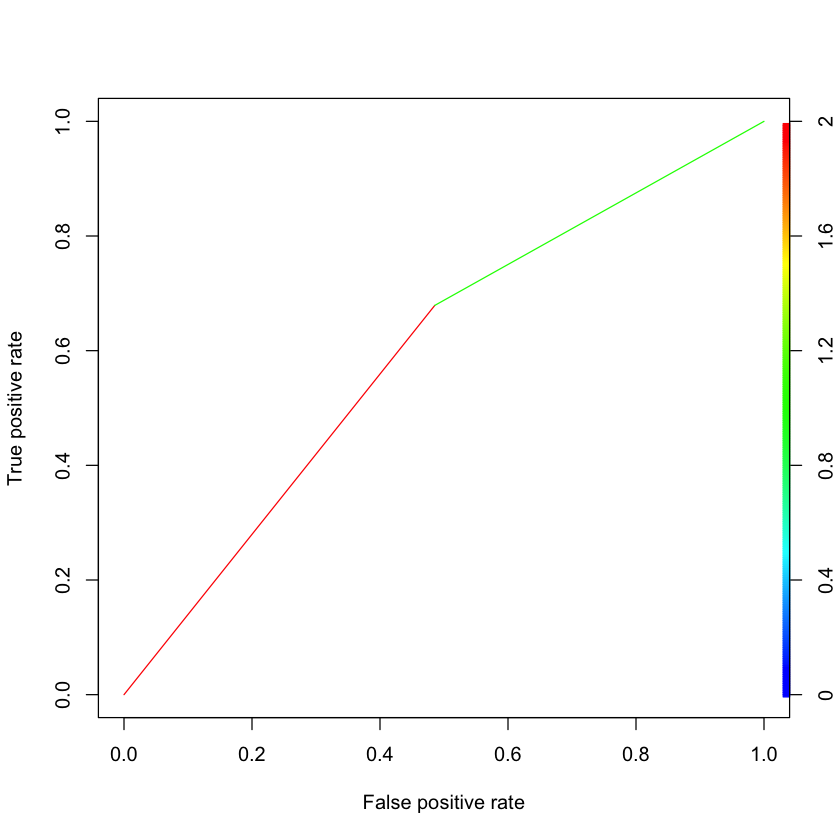

In [26]:
library(ROCR)

pred <- prediction(prediction_probabilities_testUnder, test$Class)
perf <- performance(pred, "tpr", "fpr")
plot(perf, colorize = TRUE)

##### <a id=link8> 4.1.3 SMOTE  </a>

The sampling techniques are straighforward, but could possibly engender a classifier that overfits the training data and hence might not be suitable for a general application. To handle such a chance, [SMOTE](https://www3.nd.edu/~dial/publications/chawla2002smote.pdf) was introduced by Chawla et al. in 2002 and the functionality is available in R with the package *DMwR*.

In [6]:
install.packages("DMwR")
library(DMwR)


The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//Rtmp7Ar64M/downloaded_packages


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
## Smote : Synthetic Minority Oversampling Technique
## A pre-requisite is that the class variable in the data must be of "factor" category. Let's do that conversion.
train$Class <- as.factor(train$Class)

smoteData <- SMOTE(Class ~., train, perc.over = 100000, k = 5, perc.under = 100)

table(smoteData$Class)


      0       1 
1323322 1322000 

In [48]:
a549modelSMOTE <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = smoteData,
               family = "binomial")
summary(a549modelSMOTE)


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = smoteData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4374  -1.1871  -0.2421   1.1213   6.1183  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  0.3497448  0.0020660  169.289  < 2e-16 ***
CTCF        -0.1175901  0.0018048  -65.152  < 2e-16 ***
EP300       -0.0996397  0.0023994  -41.527  < 2e-16 ***
H3K27me3    -0.0621126  0.0013640  -45.538  < 2e-16 ***
H3K36me3    -0.2141989  0.0017442 -122.810  < 2e-16 ***
H3K4me1     -0.0774733  0.0007855  -98.624  < 2e-16 ***
H3K4me2      0.0076213  0.0011870    6.421 1.35e-10 ***
H3K4me3     -0.0032002  0.0011463   -2.792  0.00524 ** 
H3K9ac      -0.0035321  0.0002731  -12.931  < 2e-16 ***
H3K9me3      0.1031455  0.0013786   74.820  < 2e-16 ***
RAD21        0.0597199  0.0019358   30.850  < 2e-16 ***
RNAPol2     

Let us now examine this model with the test data.

In [49]:
yTestSMOTE <- predict(a549modelSMOTE, test, type = "response")
prediction_probabilities_testSMOTE <- ifelse(yTestSMOTE > 0.5, 1, 0)
confusion_matrix_testSMOTE <- table(Predicted = prediction_probabilities_testSMOTE, Actual = test$Class)
print(confusion_matrix_testSMOTE)

         Actual
Predicted      0      1
        0    322 140860
        1    304 322671


In [50]:
cat("The sensitivity of the model is", (sensitivity(confusion_matrix_testSMOTE))*100, "%")

The sensitivity of the model is 51.4377 %

In [51]:
cat("The specificity of the model is", (specificity(confusion_matrix_testSMOTE))*100, "%")

The specificity of the model is 69.61153 %

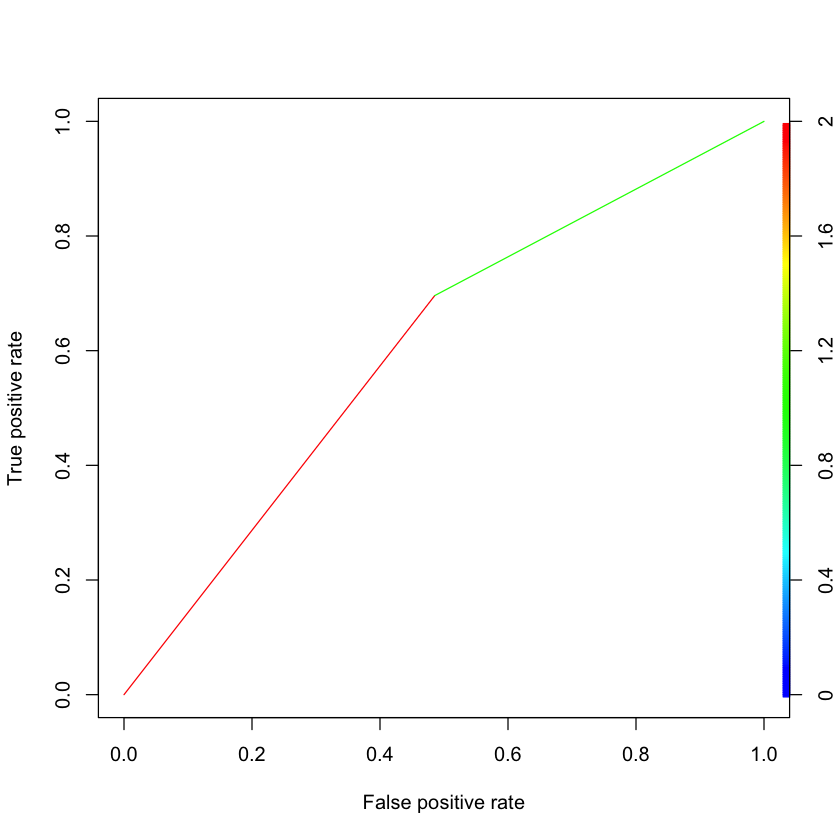

In [52]:
predSMOTE <- prediction(prediction_probabilities_testSMOTE, test$Class)
perfSMOTE <- performance(predSMOTE, "tpr", "fpr")
plot(perfSMOTE, colorize = TRUE)

##### <a id=link9> 4.1.4 Both over- and under-sampling </a>

This model has slightly better specificity than the previous model. In tandem, we could also try yet another flavor of the *ovun.sample()* function - to have under- and over-sampling both in parallel. This could be a likely run like the SMOTE as above.

In [53]:
bothTrain <- ovun.sample(Class ~., data = train, method = "both", N= 1082810)$data
table(bothTrain$Class)


     1      0 
541549 541261 

In [54]:
a549modelBoth <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = bothTrain,
               family = "binomial")
summary(a549modelBoth)


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = bothTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.5852  -1.1166  -0.9401   1.1889   1.3617  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.718e-01  3.203e-03 -116.075  < 2e-16 ***
CTCF         1.296e-01  2.646e-03   48.989  < 2e-16 ***
EP300        1.128e-01  3.454e-03   32.663  < 2e-16 ***
H3K27me3     6.569e-02  2.103e-03   31.235  < 2e-16 ***
H3K36me3     2.053e-01  2.656e-03   77.310  < 2e-16 ***
H3K4me1      7.709e-02  1.190e-03   64.757  < 2e-16 ***
H3K4me2     -2.312e-03  1.616e-03   -1.430   0.1526    
H3K4me3     -9.716e-05  1.530e-03   -0.064   0.9494    
H3K9ac       1.146e-03  3.742e-04    3.062   0.0022 ** 
H3K9me3     -9.545e-02  2.108e-03  -45.269  < 2e-16 ***
RAD21       -5.957e-02  2.720e-03  -21.903  < 2e-16 ***
RNAPol2     

In [55]:
yTestBoth <- predict(a549modelBoth, test, type = "response")
prediction_probabilities_testBoth <- ifelse(yTestBoth > 0.5, 1, 0)
confusion_matrix_testBoth <- table(Predicted = prediction_probabilities_testBoth, Actual = test$Class)
print(confusion_matrix_testBoth)

         Actual
Predicted      0      1
        0    309 327650
        1    317 135881


In [56]:
cat("The sensitivity of the model is", (sensitivity(confusion_matrix_testBoth))*100, "%")

The sensitivity of the model is 49.36102 %

In [57]:
cat("The specificity of the model is", (specificity(confusion_matrix_testBoth))*100, "%")

The specificity of the model is 29.31433 %

These numbers aren't as good. Hitherto, the model with SMOTE data has performed the best.

### <a id=link10>5. Ratifying the *Pareto's Principle* </a>

The 80:20 rule is omnipresent in the domains of business and economy. Hardly would have the italian economist known at the time that his [theory](https://en.wikipedia.org/wiki/Pareto_principle) would be rooted deeper than his perception. 

In [8]:
set.seed(6) # for reproducibility of results.
parts <- sample(2, nrow(a549greg),
               replace = TRUE,
               prob = c(0.8,0.2))
training <- a549greg[parts==1,]
testing <- a549greg[parts==2,]
cat("So, now we have", nrow(training), "training rows and", nrow(testing), "testing rows")

So, now we have 1238782 training rows and 309510 testing rows

In [9]:
a549paretoModel <- glm(formula = Class ~ ., data = training, family = "binomial")
summary(a549paretoModel)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7354   0.0447   0.0474   0.0507   1.7879  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.9587919  0.0358843 193.923  < 2e-16 ***
CTCF        -0.0916857  0.0190454  -4.814 1.48e-06 ***
EP300       -0.0510494  0.0131455  -3.883 0.000103 ***
H3K27me3    -0.0687763  0.0249685  -2.755 0.005878 ** 
H3K36me3    -0.1883406  0.0231468  -8.137 4.06e-16 ***
H3K4me1     -0.0238822  0.0051776  -4.613 3.98e-06 ***
H3K4me2     -0.0218577  0.0138078  -1.583 0.113423    
H3K4me3      0.0024806  0.0127282   0.195 0.845480    
H3K9ac      -0.0046400  0.0023864  -1.944 0.051855 .  
H3K9me3      0.0523695  0.0234842   2.230 0.025748 *  
RAD21        0.0617750  0.0176395   3.502 0.000462 ***
RNAPol2      0.0006401  0.0059480   0.108 0.914305    
YY1         -0.0117983  0.0261201  -0.452 0.651489    
---
Signif. codes:  0 ‘***’ 0.0

In [36]:
yTesting <- predict(a549paretoModel, testing, type = "response")
prediction_probabilities_testing <- ifelse(yTesting > 0.5, 1, 0)
confusion_matrix_testing <- table(Predicted = prediction_probabilities_testing, Actual = testing$Class)
print(confusion_matrix_testing)

         Actual
Predicted      0      1
        1    411 309099


We see here that the issue of class imbalance imposes skewness on the classifier to predict solely non-hubs (represented by "1"). The balancing of the data, as practiced above, might come to the rescue. Let's examine the performance of the classifier on SMOTE transformed data.

#### <a id=link11>5.1 SMOTE data </a>

In [10]:
training$Class <- as.factor(training$Class)
smoteDatum <- SMOTE(Class ~., training, perc.over = 100000, k = 5, perc.under = 100)
table(smoteDatum$Class)


      0       1 
1538537 1537000 

In [11]:
a549paretoModelSmote <- glm(formula = Class ~ ., data = smoteDatum, family = "binomial")
summary(a549paretoModelSmote)


Call:
glm(formula = Class ~ ., family = "binomial", data = smoteDatum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4497  -1.1838  -0.2159   1.1108   6.4450  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  0.4062600  0.0019438  209.005  < 2e-16 ***
CTCF        -0.1107978  0.0017051  -64.981  < 2e-16 ***
EP300       -0.1293084  0.0022420  -57.676  < 2e-16 ***
H3K27me3    -0.0829513  0.0012676  -65.439  < 2e-16 ***
H3K36me3    -0.2533316  0.0016448 -154.024  < 2e-16 ***
H3K4me1     -0.0895072  0.0007138 -125.398  < 2e-16 ***
H3K4me2      0.0266678  0.0010963   24.325  < 2e-16 ***
H3K4me3     -0.0212485  0.0009982  -21.287  < 2e-16 ***
H3K9ac      -0.0004557  0.0002395   -1.903   0.0571 .  
H3K9me3      0.1142932  0.0012627   90.514  < 2e-16 ***
RAD21        0.0517232  0.0017979   28.768  < 2e-16 ***
RNAPol2      0.0028134  0.0004227    6.656 2.81e-11 ***
YY1         -0.0191502  0.0027477   -6.969 3.18e-12 ***
---
Signif. cod

In [13]:
yTestingSmote <- predict(a549paretoModelSmote, testing, type = "response")
prediction_probabilities_testingSmote <- ifelse(yTestingSmote > 0.5, 1, 0)
confusion_matrix_testingSmote <- table(Predicted = prediction_probabilities_testingSmote, Actual = testing$Class)
print(confusion_matrix_testingSmote)

         Actual
Predicted      0      1
        0    187  92251
        1    224 216848


In [14]:
cat("The sensitivity of the model is", (sensitivity(confusion_matrix_testingSmote))*100, "%")

The sensitivity of the model is 45.49878 %

In [15]:
cat("The specificity of the model is", (specificity(confusion_matrix_testingSmote))*100, "%")

The specificity of the model is 70.15487 %

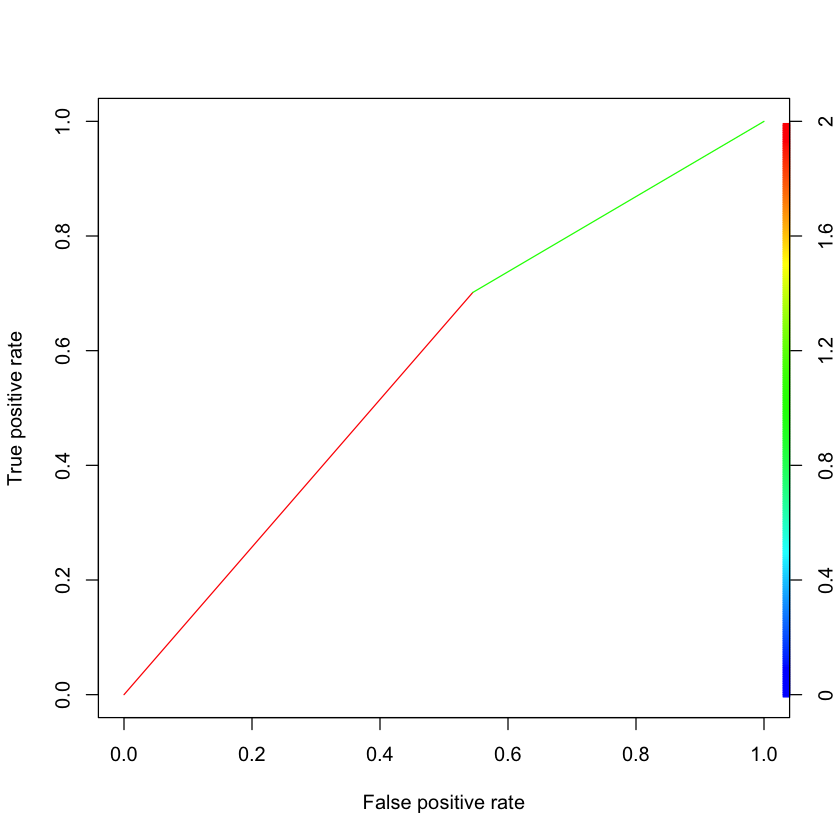

In [17]:
predictingSMOTE <- prediction(prediction_probabilities_testingSmote, testing$Class)
performanceSMOTE <- performance(predictingSMOTE, "tpr", "fpr")
plot(performanceSMOTE, colorize = TRUE)

### <a id=link12>6. Visualizing Predictions </a>

We choose to go with this model and will save the prediction results, that shall be later utilized for plotting.

In [27]:
a549gregModelPredictions <- predict(a549paretoModelSmote, a549greg, type = "response")
a549gregModelPredictionsProbs <- ifelse(a549gregModelPredictions > 0.5, 1, 0)

Eventually, we have the original dataset with the classes and the one with the model predictions. We attempt to map the prediction results corresponding to LR-Hubs from the A549 cell-line. It will be interesting to see the intersect of the pre-caliberated LR-Hubs and the ones predicted by the classifier.

The workflow commences with the installation of <a href = "http://www.bioconductor.org/packages/release/bioc/html/Gviz.html" > Gviz </a> - the package we aim to deploy for the visualization.

In [28]:
BiocManager::install("Gviz")
library(Gviz)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

Next, we recall the data from the A549 cell-line (GREG). We already know, this is a comprehensive data (genome-wide) with values corresponding to epigenetic marks (features) for each bin (a 2Kb genomic region), in addition to a "Class", i.e. a "Hub" or a "Non-Hub". For the present case, we shall prune the data for the genomic intervals and their corresponding class. That is all we need!

In [32]:
a549gregStandard <- read.table("A549forML.txt", header = TRUE) ## full data
a549gregStandardRegionsClass <- a549gregStandard[, c(1:3,16)]

Also, considering the computational resources we deploy, we shall focus on chromosome 21 only.

In [33]:
# Extracting chr21 data

a549gregChr21NonHub <- a549gregStandardRegionsClass[a549gregStandardRegionsClass$chr=="chr21" & a549gregStandardRegionsClass$Class=="Non-Hub", ] ## subset of data for exemplifying
a549gregChr21Hub <- a549gregStandardRegionsClass[a549gregStandardRegionsClass$chr=="chr21" & a549gregStandardRegionsClass$Class=="Hub", ]

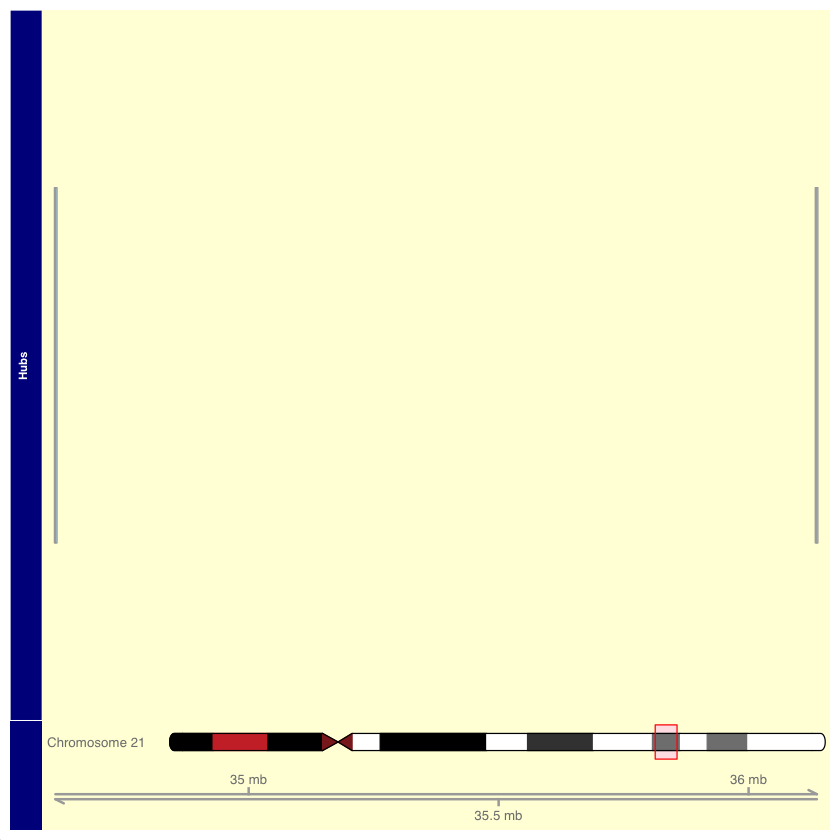

In [90]:
# Plotting Hubs

annotationTrackHub <- AnnotationTrack(range = a549gregChr21Hub, 
                                      name = "Hubs", 
                                      genome = "hg38", 
                                      chromosome = "chr21")
itrack <- IdeogramTrack(genome = "hg38", chromosome = "chr21")
genomeTrack <- GenomeAxisTrack()
plotTracks(list(annotationTrackHub, itrack, genomeTrack), 
           background.panel = "#FFFEDB", 
           background.title = "darkblue",
           stacking = "dense")

So, there is a narrow occurrence of "hubs" in the chromosome 21, as seen above. The specific locations are given below.

In [35]:
print(a549gregChr21Hub)

         chr    start      end Class
814391 chr21 34612001 34614000   Hub
814392 chr21 34614001 34616000   Hub
815152 chr21 36134001 36136000   Hub
815153 chr21 36136001 36138000   Hub


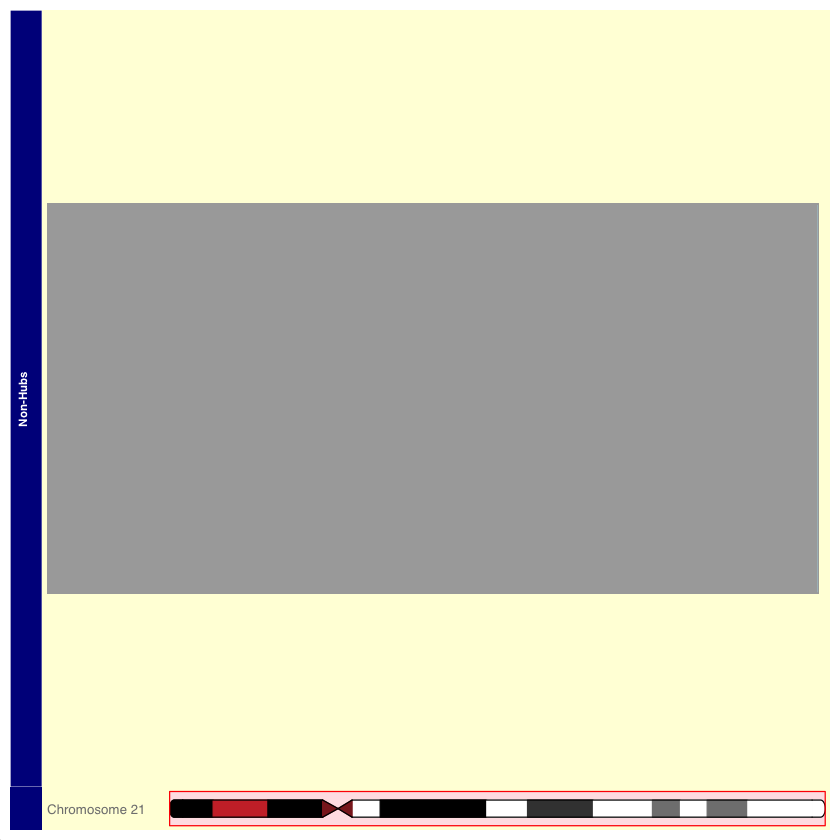

In [85]:
# Plotting Non-Hubs

annotationTrackNonHub <- AnnotationTrack(range = a549gregChr21NonHub, 
                                         name = "Non-Hubs", 
                                         genome = "hg38", 
                                         chromosome = "chr21")
itrack <- IdeogramTrack(genome = "hg38", chromosome = "chr21")
plotTracks(list(annotationTrackNonHub, itrack),
           background.panel = "#FFFEDB", 
           background.title = "darkblue",
           stacking = "dense")

In contrast, we are curious to examine if the findings of the classifier are able to fortify the original class definitions. Let us frame the data from the predicted results.  

In [67]:
a549gregPredicted <- cbind(a549gregStandardRegionsClass, a549gregModelPredictionsProbs)
names(a549gregPredicted)[names(a549gregPredicted)=="a549gregModelPredictionsProbs"] <- "Prediction"
a549gregPredicted$Prediction <- ifelse(a549gregPredicted$Prediction == 1, "Non-Hub", "Hub")            

Let us see if the classifier predictions match with the original results.

In [70]:
a549gregChr21PredicitedHub <- a549gregPredicted[a549gregPredicted$chr=="chr21" & a549gregPredicted$Prediction=="Hub", ]
print(a549gregChr21PredicitedHub)

         chr    start      end   Class Prediction
801933 chr21  9696001  9698000 Non-Hub        Hub
801934 chr21  9698001  9700000 Non-Hub        Hub
801997 chr21  9824001  9826000 Non-Hub        Hub
801998 chr21  9826001  9828000 Non-Hub        Hub
801999 chr21  9828001  9830000 Non-Hub        Hub
802000 chr21  9830001  9832000 Non-Hub        Hub
802001 chr21  9832001  9834000 Non-Hub        Hub
802002 chr21  9834001  9836000 Non-Hub        Hub
802003 chr21  9836001  9838000 Non-Hub        Hub
802004 chr21  9838001  9840000 Non-Hub        Hub
802006 chr21  9842001  9844000 Non-Hub        Hub
802435 chr21 10700001 10702000 Non-Hub        Hub
802628 chr21 11086001 11088000 Non-Hub        Hub
802639 chr21 11108001 11110000 Non-Hub        Hub
802670 chr21 11170001 11172000 Non-Hub        Hub
802671 chr21 11172001 11174000 Non-Hub        Hub
802672 chr21 11174001 11176000 Non-Hub        Hub
802674 chr21 11178001 11180000 Non-Hub        Hub
802675 chr21 11180001 11182000 Non-Hub        Hub


Certainly, the predicted hubs are far more in number and there are noticeable instances of "Non-Hubs" that have been classified as "Hubs", with the given profile of the classification model.  

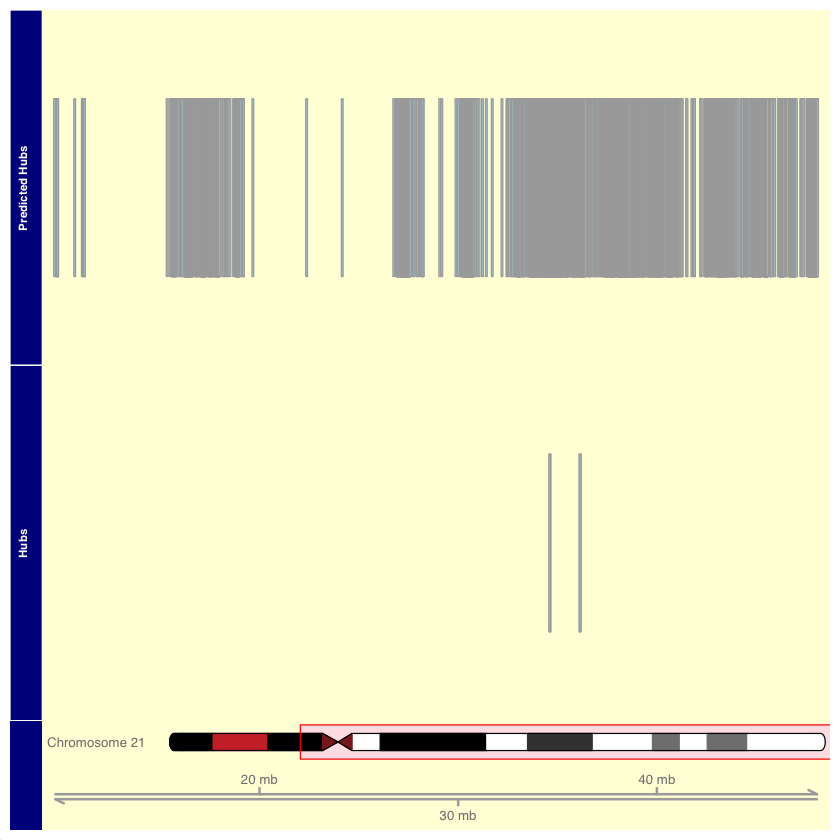

In [93]:
# Plotting Predicted Hubs
annotationTrackHub <- AnnotationTrack(range = a549gregChr21Hub, 
                                      name = "Hubs", 
                                      genome = "hg38", 
                                      chromosome = "chr21")
annotationTrackPredictedHub <- AnnotationTrack(range = a549gregChr21PredicitedHub, 
                                               name = "Predicted Hubs", 
                                               genome = "hg38", 
                                               chromosome = "chr21")
itrack <- IdeogramTrack(genome = "hg38", chromosome = "chr21")
genomeTrack <- GenomeAxisTrack()
plotTracks(list(annotationTrackPredictedHub,annotationTrackHub, itrack, genomeTrack), 
           background.panel = "#FFFEDB", 
           background.title = "darkblue",
           stacking = "dense")

### <a id=link13>7. Session Information </a>

In [73]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] Gviz_1.32.0          GenomicRanges_1.40.0 GenomeInfoDb_1.24.2 
 [4] IRanges_2.22.2       S4Vectors_0.26.1     BiocGenerics_0.34.0 
 [7] ROCR_1.0-11          DMwR_0.4.1           rms_6.0-1           
[10] SparseM_1.78         Hmisc_4.4-1          Formula_1.2-3       
[13] survival_3.2-3       ROSE_0.0-3           e1071_1.7-3         
[16] caret_6.0-86         ggplot2_3.3.2        lattice_0.20-41     

loaded via a namespace (and not attached):
  [1] uuid_0.1-4                  backports_1.1.9       